In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import altair as alt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [61]:
df = pd.read_csv(f"../datasets/normalized/unsupervised_learning/final_player_dataset.csv")


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           284 non-null    int64  
 1   player_name          284 non-null    object 
 2   Current Team         284 non-null    object 
 3   overall_ratings      284 non-null    float64
 4   avg_rating_10_games  284 non-null    float64
 5   goals_per_90min      284 non-null    float64
 6   yels                 284 non-null    float64
 7   reds                 284 non-null    float64
 8   shoots_per_game      284 non-null    float64
 9   pass_success         284 non-null    float64
 10  tackles              284 non-null    float64
 11  fouls                284 non-null    float64
 12  offsides_won         284 non-null    float64
 13  clear                284 non-null    float64
 14  drb                  284 non-null    float64
 15  blocks               284 non-null    flo

<Axes: >

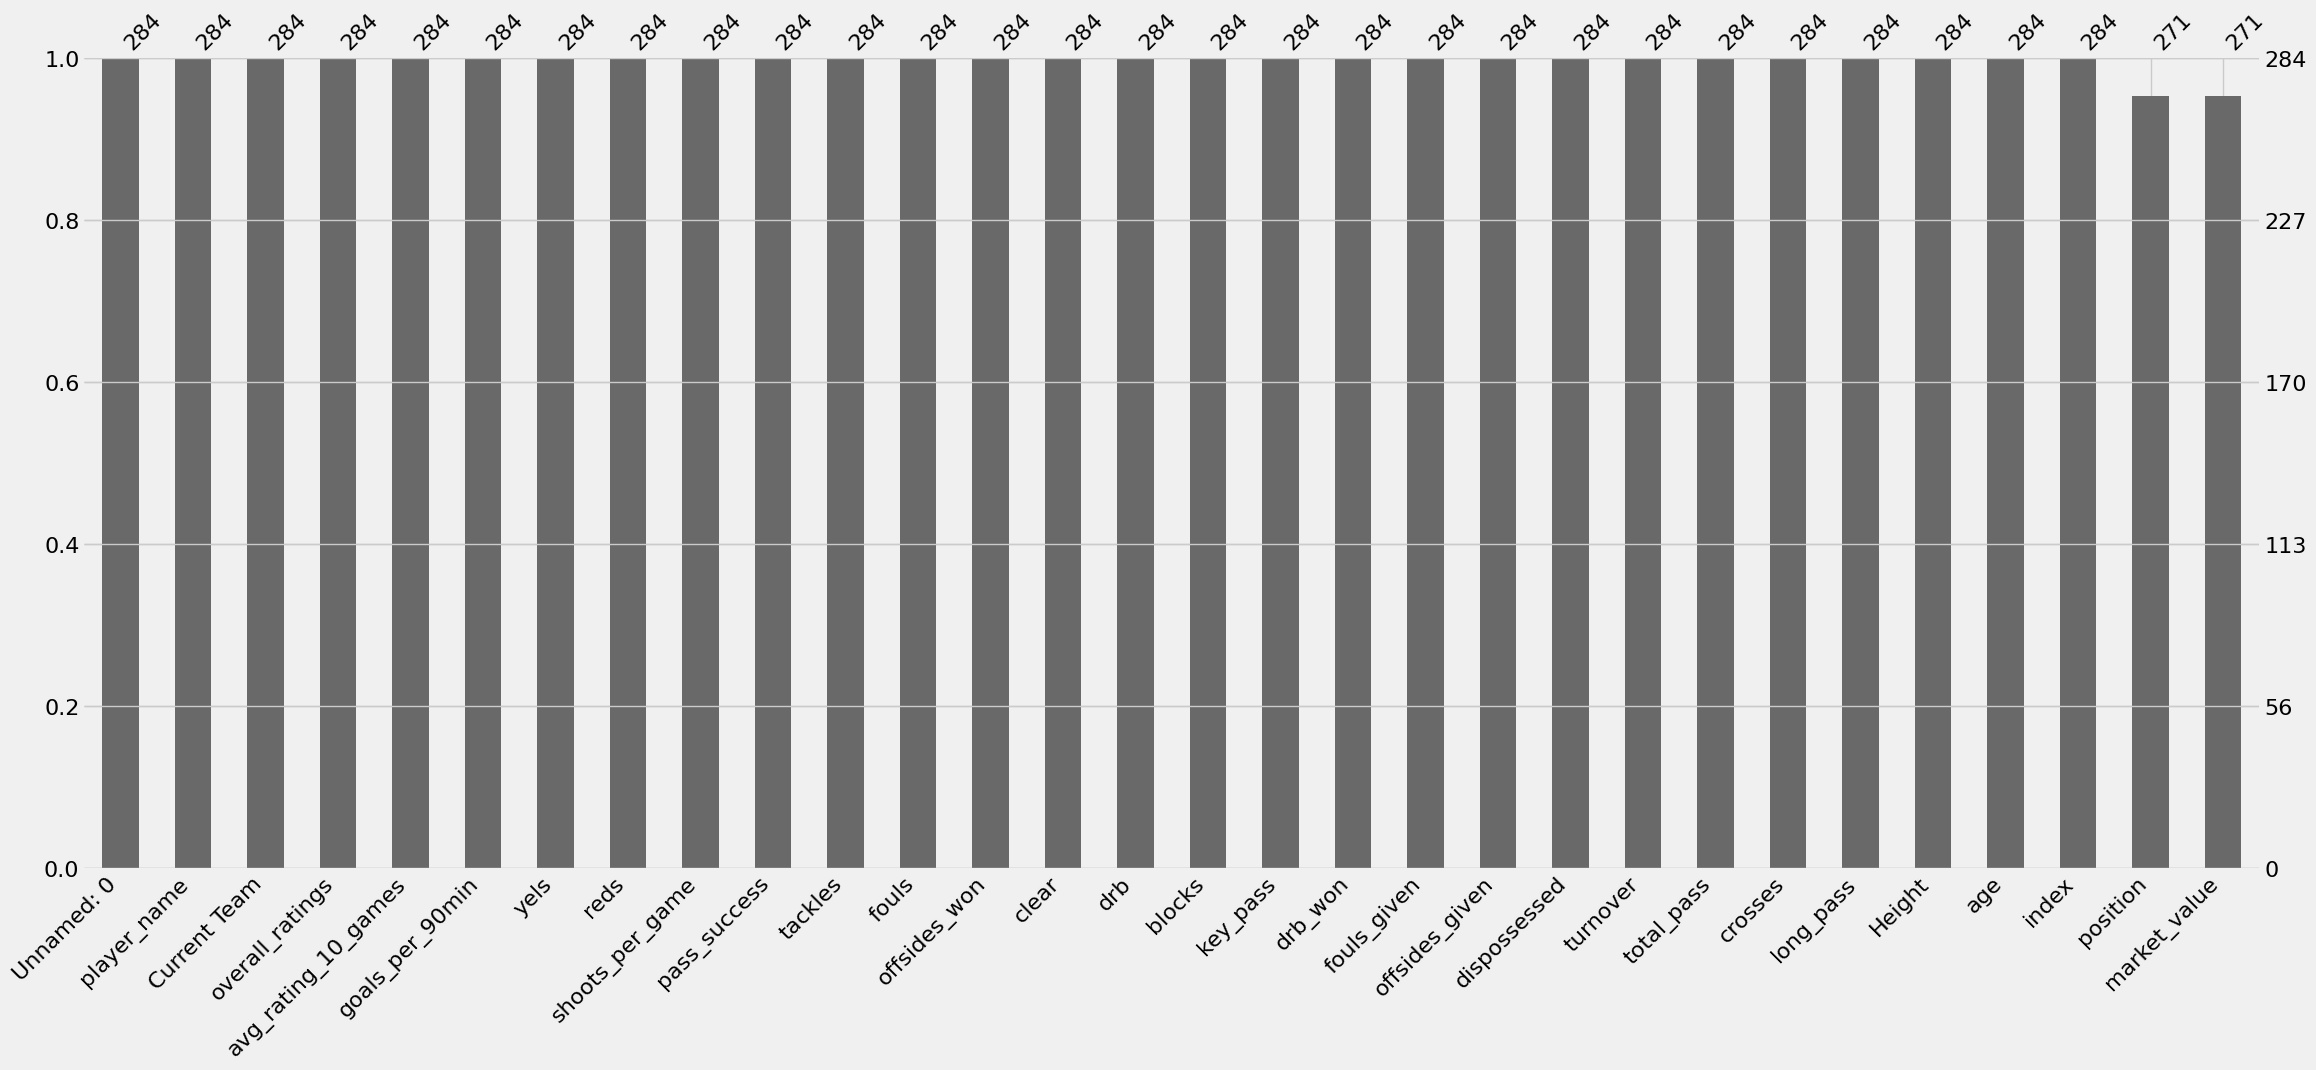

In [63]:
msno.bar(df)

In [64]:
# we don't use position and market_value as a feature. So do not delete the items with null values in posision and market_value.
df.columns

Index(['Unnamed: 0', 'player_name', 'Current Team', 'overall_ratings',
       'avg_rating_10_games', 'goals_per_90min', 'yels', 'reds',
       'shoots_per_game', 'pass_success', 'tackles', 'fouls', 'offsides_won',
       'clear', 'drb', 'blocks', 'key_pass', 'drb_won', 'fouls_given',
       'offsides_given', 'dispossessed', 'turnover', 'total_pass', 'crosses',
       'long_pass', 'Height', 'age', 'index', 'position', 'market_value'],
      dtype='object')

In [65]:
# feature selection

features = ['overall_ratings',
 'avg_rating_10_games',
 'goals_per_90min',
 'yels',
 'reds',
 'shoots_per_game',
 'pass_success',
 'tackles',
 'fouls',
 'offsides_won',
 'clear',
 'drb',
 'blocks',
 'key_pass',
 'drb_won',
 'fouls_given',
 'offsides_given',
 'dispossessed',
 'turnover',
 'total_pass',
 'crosses',
 'long_pass']

In [66]:
features

['overall_ratings',
 'avg_rating_10_games',
 'goals_per_90min',
 'yels',
 'reds',
 'shoots_per_game',
 'pass_success',
 'tackles',
 'fouls',
 'offsides_won',
 'clear',
 'drb',
 'blocks',
 'key_pass',
 'drb_won',
 'fouls_given',
 'offsides_given',
 'dispossessed',
 'turnover',
 'total_pass',
 'crosses',
 'long_pass']

In [67]:
# standard scaler
from sklearn.preprocessing import StandardScaler

X = np.array(df[features])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.90864068, -1.11238778, -0.84751973, ..., -0.19618721,
        -0.17695456, -0.37245871],
       [-0.2580247 , -0.25778787, -0.84751973, ..., -0.28182045,
        -0.6926118 ,  2.04232581],
       [-0.1224797 ,  0.19882147,  0.03878458, ...,  0.18304572,
        -0.60666893, -0.54772532],
       ...,
       [-1.11195818, -0.5539669 , -0.26087743, ..., -0.17783723,
        -0.30586887, -0.25561429],
       [ 0.14861029,  0.31914421, -0.84751973, ..., -0.06773735,
         1.37001716, -0.72299194],
       [-0.56977819, -0.98280946, -0.84751973, ..., -0.36745369,
        -0.6926118 ,  1.16599272]])

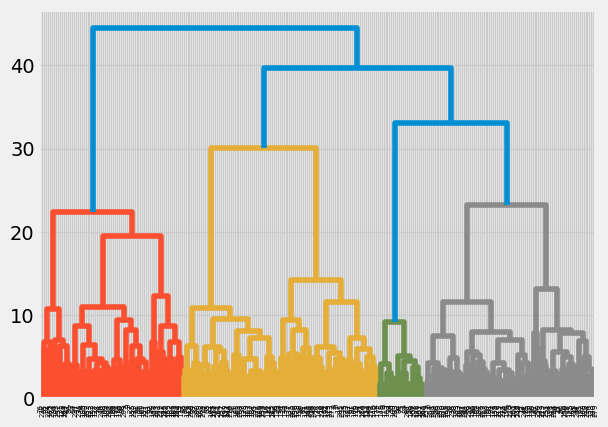

In [68]:
dendrogram = sch.dendrogram(sch.linkage(scaled_X, method='ward'))

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/P

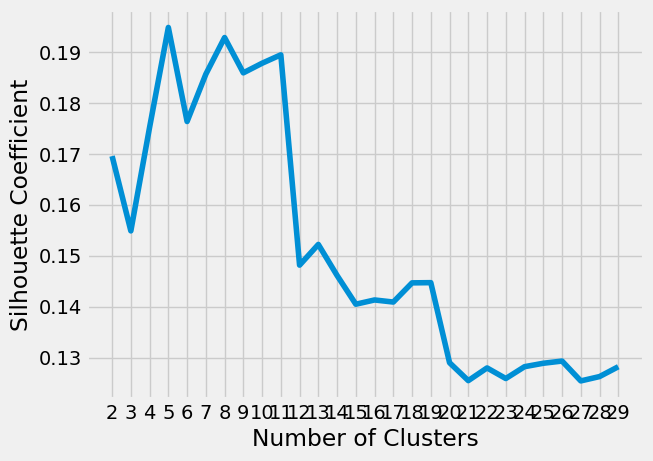

In [69]:
# To get silhouette_score
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 30):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    model.fit(scaled_X)
    score = silhouette_score(scaled_X, model.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [77]:
### visualize silhouette score
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

 
    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage='ward')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/P

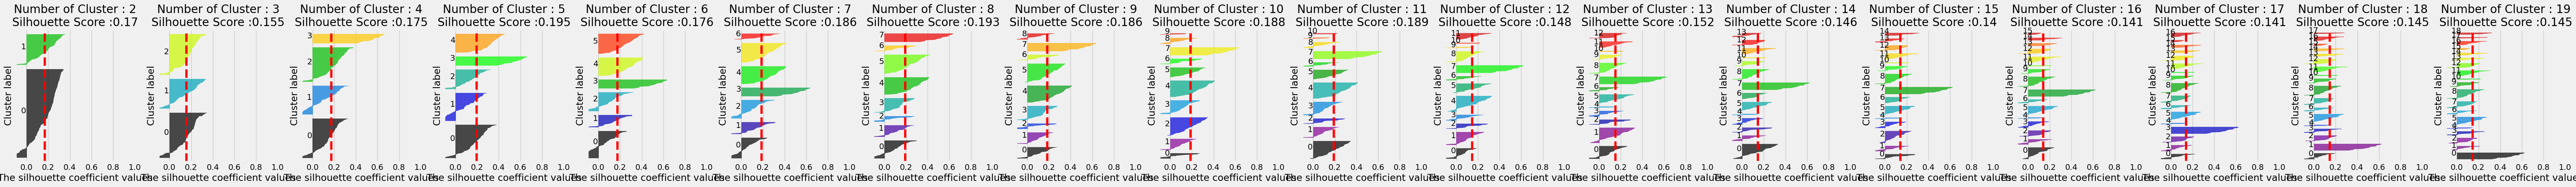

In [78]:
visualize_silhouette(range(2,20), scaled_X)

In [79]:
# 5 and 8 is the best but is to small for our purpose. I would choose 11
OPTIMAL_N_CLUSTERS = 11

model = AgglomerativeClustering(n_clusters=OPTIMAL_N_CLUSTERS, affinity='euclidean', linkage='ward')
model.fit(scaled_X)
labels = model.labels_
df['cluster'] = labels

df


/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Unnamed: 0,player_name,Current Team,overall_ratings,avg_rating_10_games,goals_per_90min,yels,reds,shoots_per_game,pass_success,...,turnover,total_pass,crosses,long_pass,Height,age,index,position,market_value,cluster
0,0,Aaron Hickey,Brentford,6.450000,6.276,0.000000,7.000000,0.000000,0.400000,84.700000,...,0.600000,28.4,0.200000,1.100000,178,20,0,Left-Back,18.0,1
1,1,Aaron Ramsdale,Arsenal,6.610000,6.553,0.000000,1.000000,0.000000,0.000000,56.433333,...,0.033333,27.0,0.000000,5.233333,188,25,1,Goalkeeper,38.0,7
2,2,Abdoulaye Doucouré,Everton,6.643333,6.701,0.131502,6.000000,0.333333,0.833333,81.700000,...,1.200000,34.6,0.033333,0.800000,184,30,2,Central Midfield,12.0,1
3,3,Adam Forshaw,Leeds,6.260000,6.253,0.000000,2.500000,0.000000,0.300000,83.250000,...,0.800000,26.0,0.150000,1.600000,174,31,3,Central Midfield,1.8,0
4,4,Adam Smith,Bournemouth,6.320000,6.371,0.000000,10.000000,0.000000,0.100000,75.100000,...,0.600000,25.8,0.500000,1.600000,180,32,4,Right-Back,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,Yoane Wissa,Brentford,6.515000,6.497,0.455392,1.000000,0.000000,1.000000,70.650000,...,1.100000,8.8,0.000000,0.200000,176,26,279,Left Winger,15.0,5
280,280,Youri Tielemans,Leicester,6.920000,6.518,0.161746,4.333333,0.000000,1.366667,82.333333,...,1.200000,55.9,0.466667,2.500000,176,26,280,Central Midfield,30.0,8
281,281,Zanka,Brentford,6.400000,6.457,0.087041,1.500000,0.000000,0.250000,80.450000,...,0.100000,28.7,0.150000,1.300000,191,33,281,Centre-Back,1.5,0
282,282,_lex Moreno,Aston Villa,6.710000,6.740,0.000000,3.000000,0.000000,0.700000,79.400000,...,2.000000,30.5,0.800000,0.500000,179,30,282,Left-Back,20.0,6


In [80]:
print(df['cluster'].value_counts())

df.to_csv('../datasets/labeled_after_clustering/aggromerative/player_stats_with_label.csv')

cluster
0     54
4     49
3     41
1     33
5     29
7     24
8     18
2     16
6     13
9      4
10     3
Name: count, dtype: int64


In [81]:
# To evaluate, we convert the unsupervised clustering problem into a One-vs-all supervised classification problem.
for i in range(OPTIMAL_N_CLUSTERS):
    mapper = {c: 1 if i == c else 0 for c in range(OPTIMAL_N_CLUSTERS)}
    df[f'cluster {i}'] = df['cluster'].map(mapper)
df

,Unnamed: 0,player_name,Current Team,overall_ratings,avg_rating_10_games,goals_per_90min,yels,reds,shoots_per_game,pass_success,...,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10
0,0,Aaron Hickey,Brentford,6.450000,6.276,0.000000,7.000000,0.000000,0.400000,84.700000,...,1,0,0,0,0,0,0,0,0,0
1,1,Aaron Ramsdale,Arsenal,6.610000,6.553,0.000000,1.000000,0.000000,0.000000,56.433333,...,0,0,0,0,0,0,1,0,0,0
2,2,Abdoulaye Doucouré,Everton,6.643333,6.701,0.131502,6.000000,0.333333,0.833333,81.700000,...,1,0,0,0,0,0,0,0,0,0
3,3,Adam Forshaw,Leeds,6.260000,6.253,0.000000,2.500000,0.000000,0.300000,83.250000,...,0,0,0,0,0,0,0,0,0,0
4,4,Adam Smith,Bournemouth,6.320000,6.371,0.000000,10.000000,0.000000,0.100000,75.100000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,Yoane Wissa,Brentford,6.515000,6.497,0.455392,1.000000,0.000000,1.000000,70.650000,...,0,0,0,0,1,0,0,0,0,0
280,280,Youri Tielemans,Leicester,6.920000,6.518,0.161746,4.333333,0.000000,1.366667,82.333333,...,0,0,0,0,0,0,0,1,0,0
281,281,Zanka,Brentford,6.400000,6.457,0.087041,1.500000,0.000000,0.250000,80.450000,...,0,0,0,0,0,0,0,0,0,0
282,282,_lex Moreno,Aston Villa,6.710000,6.740,0.000000,3.000000,0.000000,0.700000,79.400000,...,0,0,0,0,0,1,0,0,0,0


In [82]:
# train a classifier and get feature importances
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
feature_importances = []
feature_columns = ['cluster','feature_name','feature_importance']
df_fi = pd.DataFrame(columns=feature_columns)
for i in range(OPTIMAL_N_CLUSTERS):
    clf.fit(df[features].values, df[f"cluster {i}"].values)
    
    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

    # Get the most important features names and weights
    most_important_features = np.take_along_axis(
        np.array(df.iloc[:, 2:24].columns.tolist()), 
        sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
        np.array(clf.feature_importances_), 
        sorted_feature_weight_idxes, axis=0)
    

    # Show
    feature_importances.append(list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi_cluster = pd.DataFrame(columns=feature_columns, data=list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi = pd.concat([df_fi, df_fi_cluster])
    
feature_importances


[[(0, 'Current Team', 0.12310123325224857),
  (0, 'drb', 0.12027600653308108),
  (0, 'reds', 0.08201182406825426),
  (0, 'crosses', 0.07170551029075725),
  (0, 'overall_ratings', 0.06416684801194625),
  (0, 'dispossessed', 0.054539559838210114),
  (0, 'goals_per_90min', 0.0534844186687907),
  (0, 'turnover', 0.052333914992307606),
  (0, 'shoots_per_game', 0.041003431156813056),
  (0, 'avg_rating_10_games', 0.040346657789064905),
  (0, 'tackles', 0.03703775978534558),
  (0, 'offsides_given', 0.030142020609420447),
  (0, 'key_pass', 0.028916220489297897),
  (0, 'blocks', 0.028498920254961323),
  (0, 'total_pass', 0.027279097177908922),
  (0, 'fouls_given', 0.026093558618131996),
  (0, 'drb_won', 0.025566720923224182),
  (0, 'pass_success', 0.024532059064101108),
  (0, 'offsides_won', 0.022271453467758422),
  (0, 'clear', 0.020877648946803513),
  (0, 'fouls', 0.018408554507653878),
  (0, 'yels', 0.007406581553919136)],
 [(1, 'goals_per_90min', 0.12303218232680793),
  (1, 'tackles', 0.1119

In [83]:
df_fi

,cluster,feature_name,feature_importance
0,0,Current Team,0.123101
1,0,drb,0.120276
2,0,reds,0.082012
3,0,crosses,0.071706
4,0,overall_ratings,0.064167
...,...,...,...
17,10,key_pass,0.006582
18,10,offsides_given,0.004710
19,10,offsides_won,0.004240
20,10,goals_per_90min,0.000086


In [84]:
# visualize feature importance
import altair as alt

alt.Chart(df_fi).mark_rect().encode(
    x='cluster:O',
    y='feature_name:N',
    color='feature_importance:Q'
).properties(
    width=800,
    height=800
).configure_axis(
    labelFontSize=20
)


alt.Chart(...)

In [85]:
final_chart = alt.vconcat()
row_chart = alt.hconcat()

for i in range(OPTIMAL_N_CLUSTERS):
    df_cluster = df_fi[df_fi['cluster'] == i]
    base = alt.Chart(df_cluster, title=f'Cluster {i}').encode(
        x='feature_importance:Q',
        y=alt.Y('feature_name:N').sort('-x'),
        text=alt.Text('feature_importance:Q', format=".3"),
        color=alt.condition(
            alt.datum.feature_importance > 0.1,
            alt.value("orange"),
            alt.value('skyblue')
        )
    )

    bar = base.mark_bar().properties(
        width=200,
        height=800,
    )

    text = base.mark_text(align='left', dx=2)

    chart = (bar + text)
    if i == 0 :
        row_chart = chart
    elif i == 5:
        final_chart = alt.vconcat(final_chart, row_chart) 
        row_chart = chart
    else :
        row_chart = alt.hconcat(row_chart, chart)

final_chart = alt.vconcat(final_chart, row_chart)
    
final_chart.configure_title(
        fontSize=24,
    ).configure_axis(
        labelFontSize=20,
        titleFontSize=24,
    ).configure_text(
        fontSize=20
    )

alt.VConcatChart(...)

In [161]:
df[df['cluster'] == 2][['player_name', 'overall_ratings', 'avg_rating_10_games', 'position', 'market_value', 'age', 'x', 'y']].sort_values('overall_ratings', ascending=False)

,player_name,overall_ratings,avg_rating_10_games,position,market_value,age,x,y
94,Harry Kane,7.570000,7.410,Centre-Forward,90.0,29,40,40
105,Ivan Toney,7.265000,6.895,Centre-Forward,50.0,27,40,40
193,Mohamed Salah,7.246667,7.368,Right Winger,70.0,30,90,60
251,Son Heung-Min,7.240000,6.967,Left Winger,60.0,30,90,20
86,Gabriel Jesus,7.216667,7.074,Centre-Forward,75.0,26,40,40
164,Luis Díaz,7.205000,6.720,Left Winger,75.0,26,90,20
31,Bukayo Saka,7.103333,7.162,Right Winger,110.0,21,90,60
113,James Maddison,7.100000,7.194,Attacking Midfield,55.0,26,65,40
227,Raheem Sterling,7.043333,6.575,Left Winger,60.0,28,90,20
43,Cody Gakpo,7.030000,7.164,Left Winger,60.0,24,90,20


In [107]:
df['position'].unique()

array(['Left-Back', 'Goalkeeper', 'Central Midfield', 'Right-Back',
       'Right Winger', 'Right Midfield', 'Centre-Forward', 'Left Winger',
       'Defensive Midfield', 'Centre-Back', nan, 'Attacking Midfield',
       'Left Midfield', 'Second Striker'], dtype=object)

In [162]:
def get_x(position):
    if type(position) != str:
        return 0
    if 'Back' in position:
        return 30
    if 'Winger' in position or 'Striker' in position:
        return 90
    if 'Defensive Midfield' in position:
        return 45
    if 'Attacking Midfield' in position:
        return 65
    if 'Forward' in position:
        return 100
    return 40

def get_y(position):
    if type(position) != str:
        return 0
    if 'Left' in position:
        return 20
    if 'Right' in position:
        return 60
    return 40



In [163]:

df['x'] = df['position'].map(lambda x: get_x(x))
df['y'] = df['position'].map(lambda x: get_y(x))

In [164]:
df

,Unnamed: 0,player_name,Current Team,overall_ratings,avg_rating_10_games,goals_per_90min,yels,reds,shoots_per_game,pass_success,...,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,x,y
0,0,Aaron Hickey,Brentford,6.450000,6.276,0.000000,7.000000,0.000000,0.400000,84.700000,...,0,0,0,0,0,0,0,0,30,20
1,1,Aaron Ramsdale,Arsenal,6.610000,6.553,0.000000,1.000000,0.000000,0.000000,56.433333,...,0,0,0,0,1,0,0,0,40,40
2,2,Abdoulaye Doucouré,Everton,6.643333,6.701,0.131502,6.000000,0.333333,0.833333,81.700000,...,0,0,0,0,0,0,0,0,40,40
3,3,Adam Forshaw,Leeds,6.260000,6.253,0.000000,2.500000,0.000000,0.300000,83.250000,...,0,0,0,0,0,0,0,0,40,40
4,4,Adam Smith,Bournemouth,6.320000,6.371,0.000000,10.000000,0.000000,0.100000,75.100000,...,0,0,0,0,0,0,0,0,30,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,Yoane Wissa,Brentford,6.515000,6.497,0.455392,1.000000,0.000000,1.000000,70.650000,...,0,0,1,0,0,0,0,0,90,20
280,280,Youri Tielemans,Leicester,6.920000,6.518,0.161746,4.333333,0.000000,1.366667,82.333333,...,0,0,0,0,0,1,0,0,40,40
281,281,Zanka,Brentford,6.400000,6.457,0.087041,1.500000,0.000000,0.250000,80.450000,...,0,0,0,0,0,0,0,0,30,40
282,282,_lex Moreno,Aston Villa,6.710000,6.740,0.000000,3.000000,0.000000,0.700000,79.400000,...,0,0,0,1,0,0,0,0,30,20


In [165]:
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch
import matplotlib.pyplot as plt

def draw_position_map(df, cluster: str):
    df_cluster = df[df['cluster'] == cluster]
    
    pitch = Pitch(pitch_color='#aabb97', line_color='white', stripe_color='#c2d59d', stripe=True, line_zorder=2,)
    fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, title_space=0, grid_height=0.82, endnote_height=0.05)
    fig.set_facecolor('#22312b')

    bin_statistic = pitch.bin_statistic(df_cluster['x'], df_cluster['y'], statistic='count', bins=(25, 25)) 
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')
    cbar = fig.colorbar(pcm, ax=axs['pitch'], shrink=0.6)
    cbar.outline.set_edgecolor('#efefef')
    cbar.ax.yaxis.set_tick_params(color='#efefef')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

    axs['endnote'].text(0.4, 0, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
    axs['endnote'].arrow(0.3, 0.6, 0.2, 0, head_width=0.2, head_length=0.025, ec='w', fc='w')
    axs['endnote'].set_xlim(0, 1)
    axs['endnote'].set_ylim(0, 1)
    axs['title'].text(0.5, 0.7, f'The position distribution for cluster {cluster}', color='#c7d5cc', va='center', ha='center', fontsize=30)
    axs['title'].text(0.5, 0.25, 'The Game\'s First Half', color='#c7d5cc', va='center', ha='center', fontsize=18)

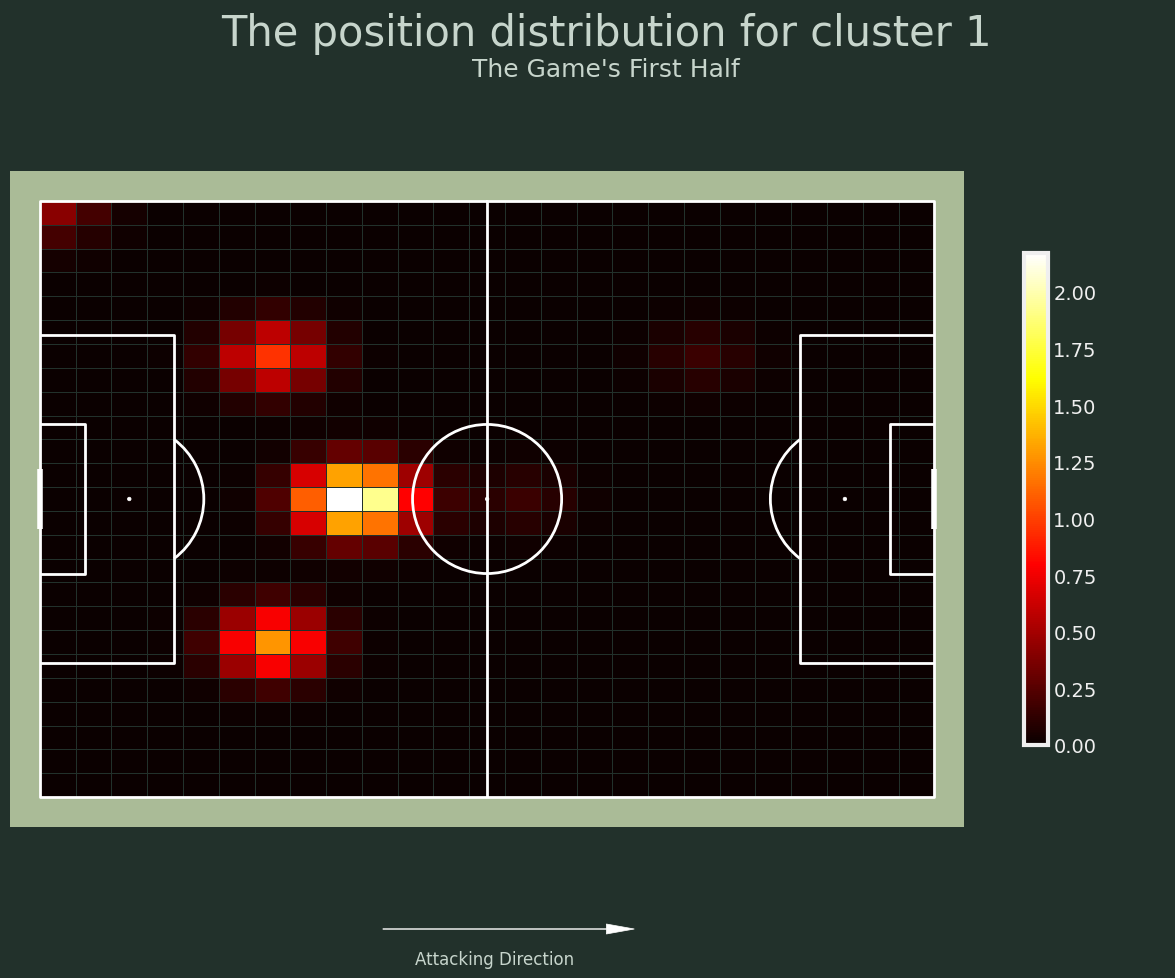

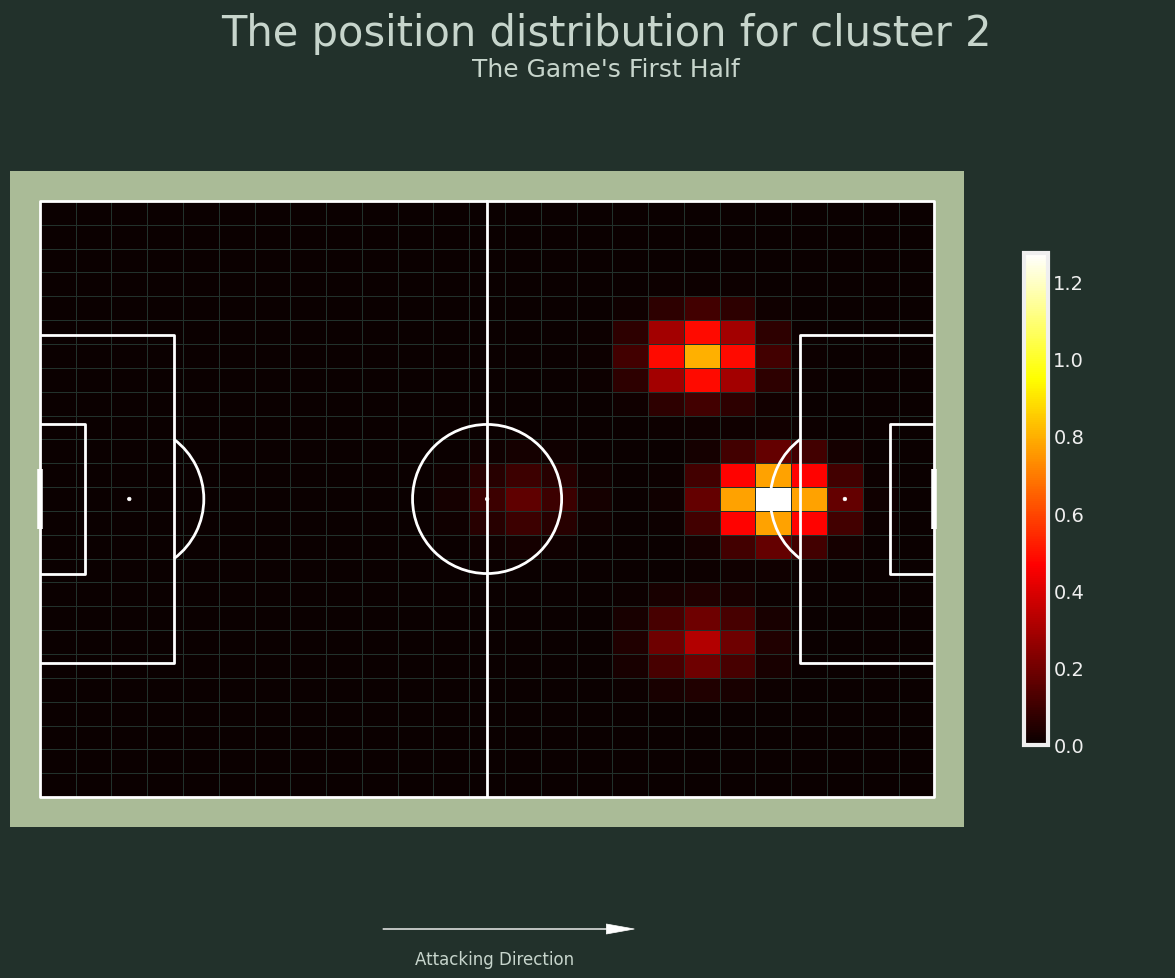

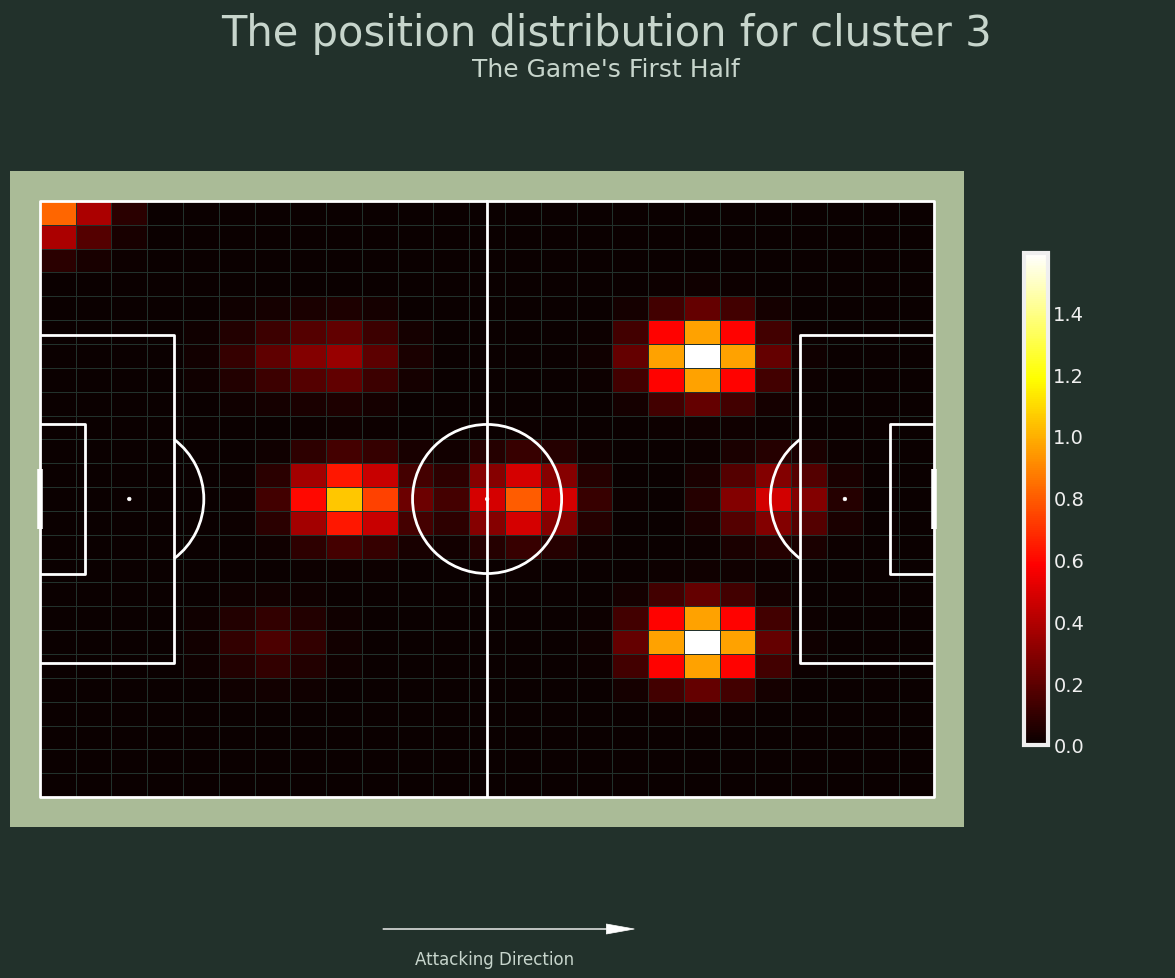

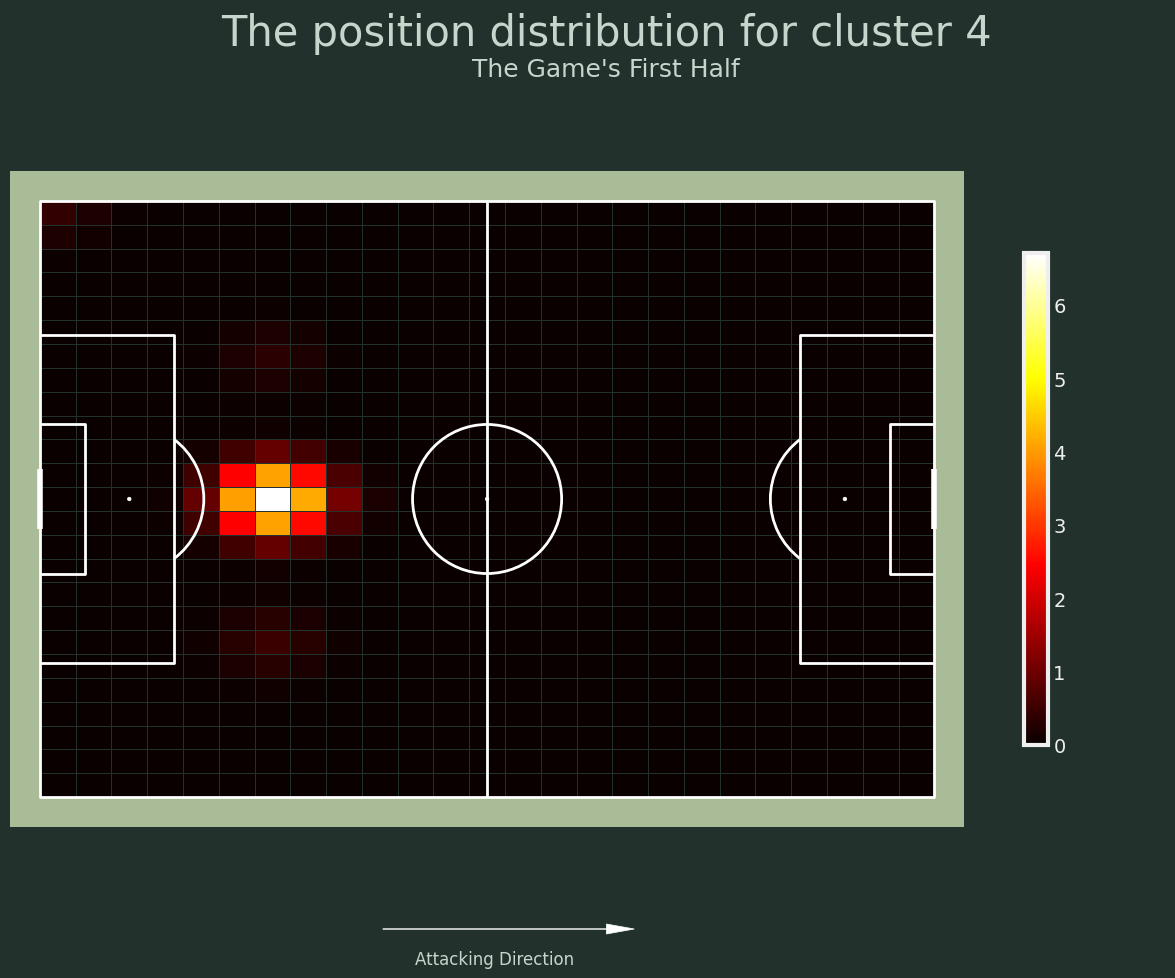

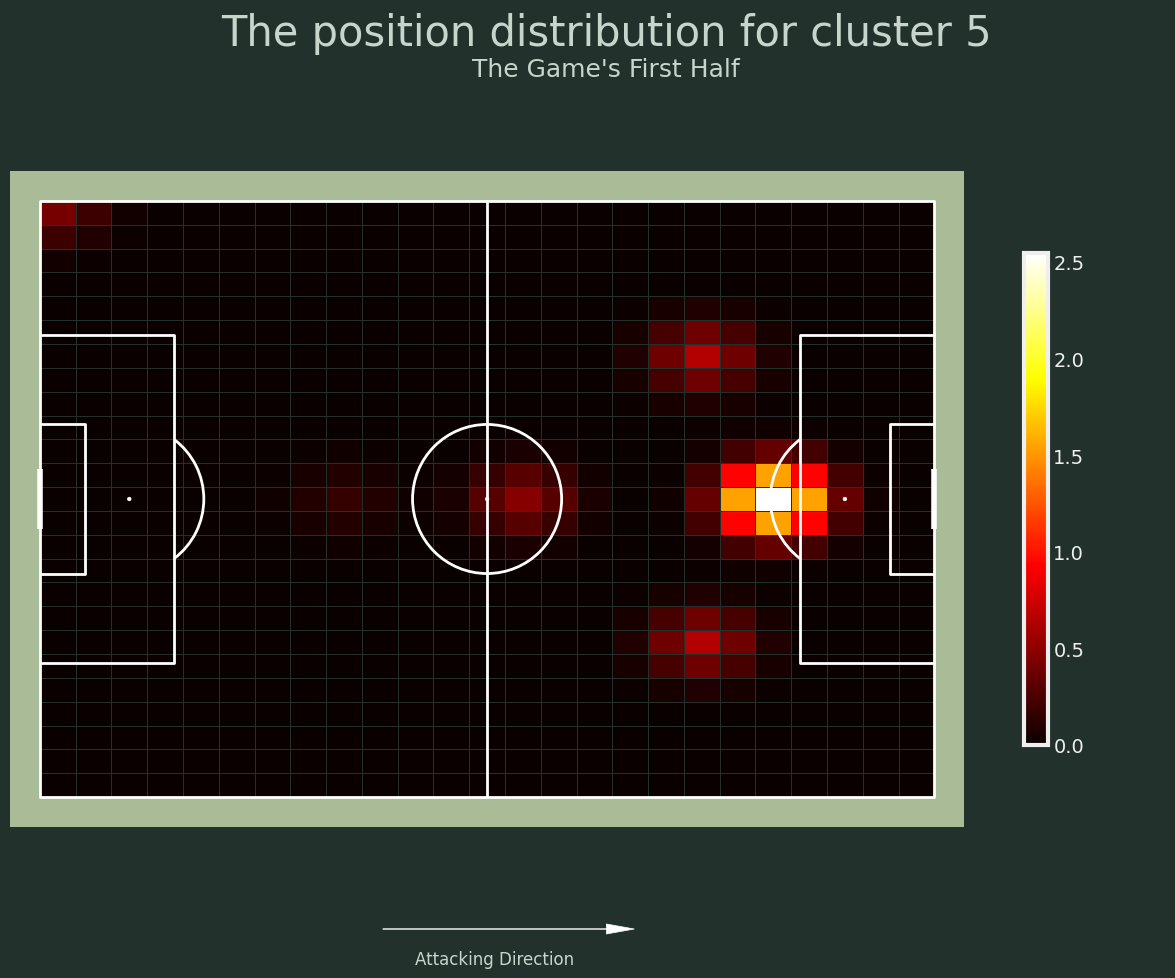

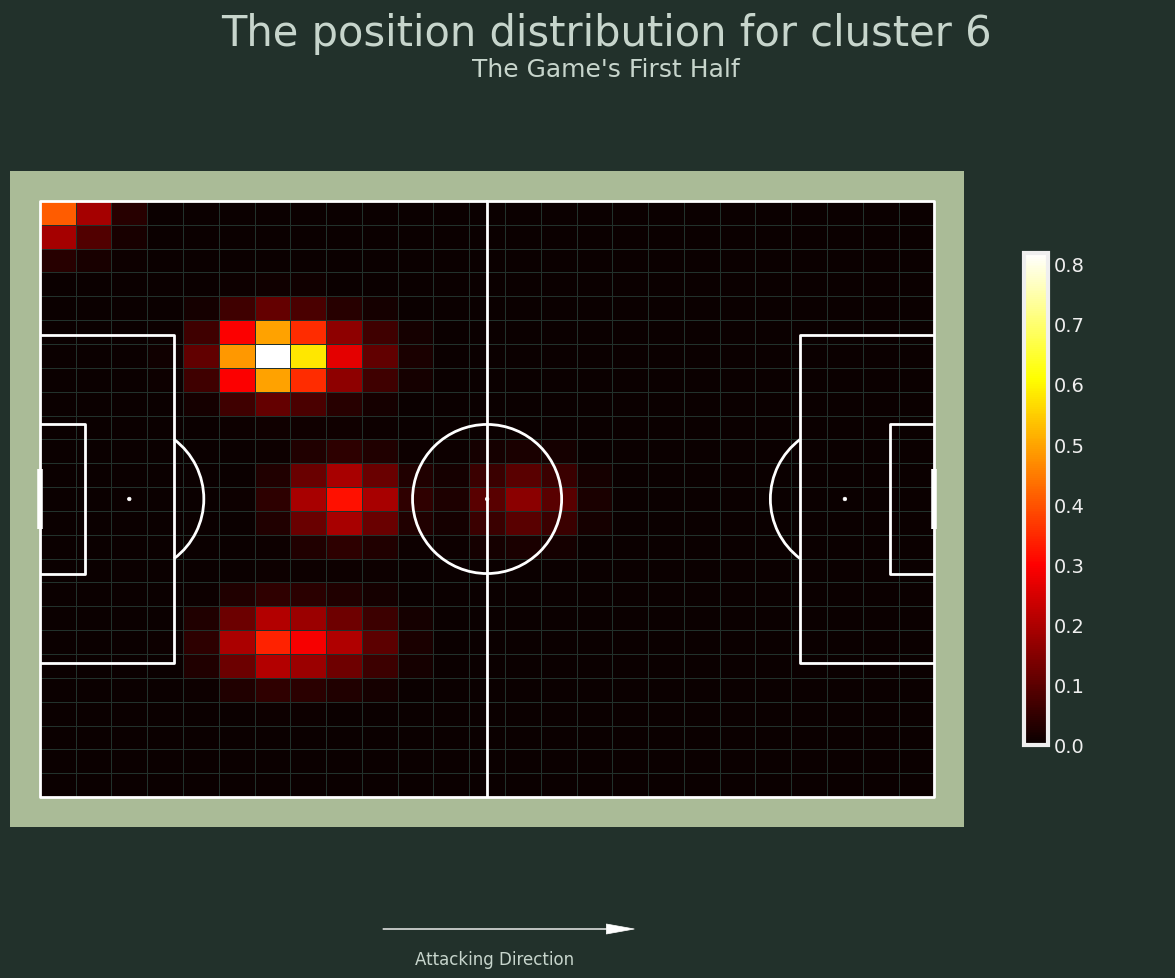

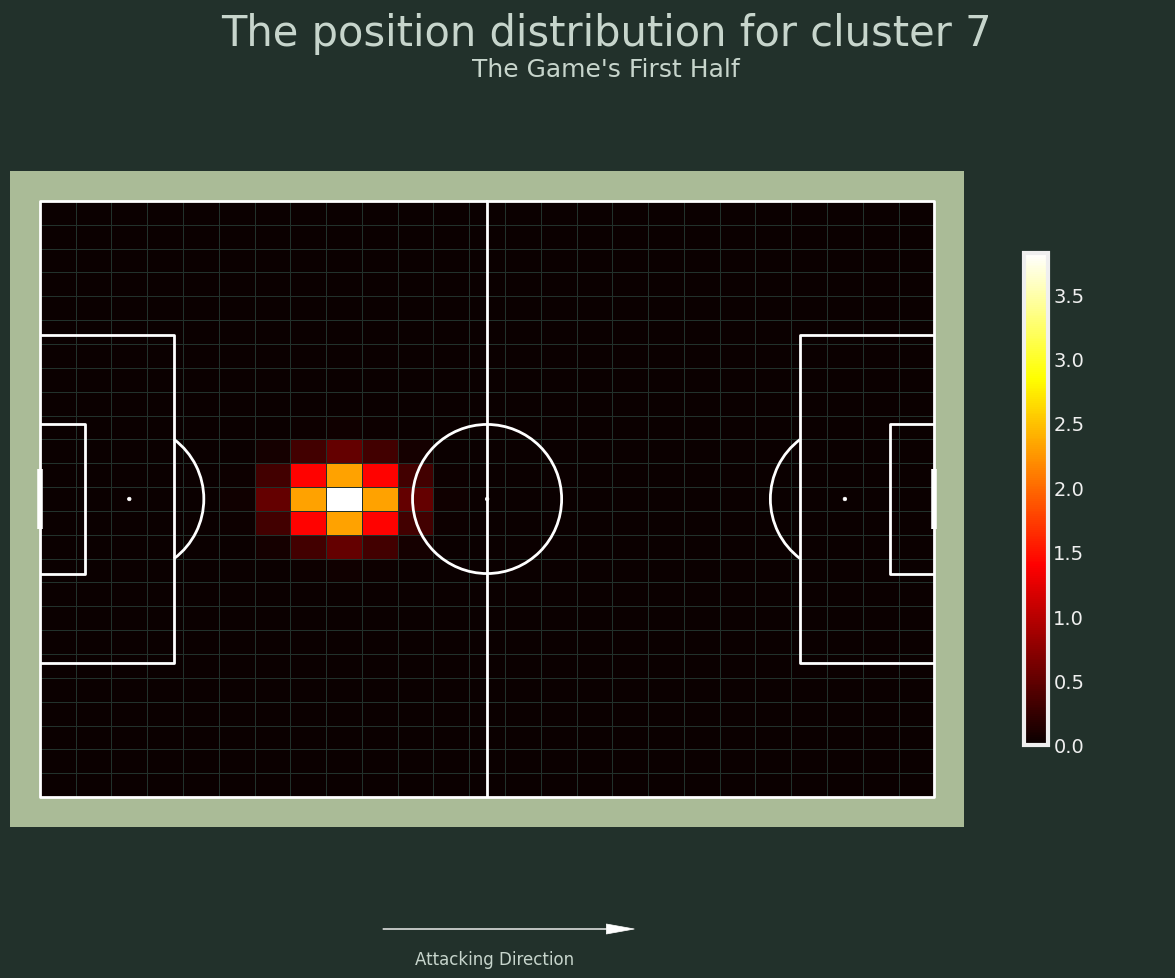

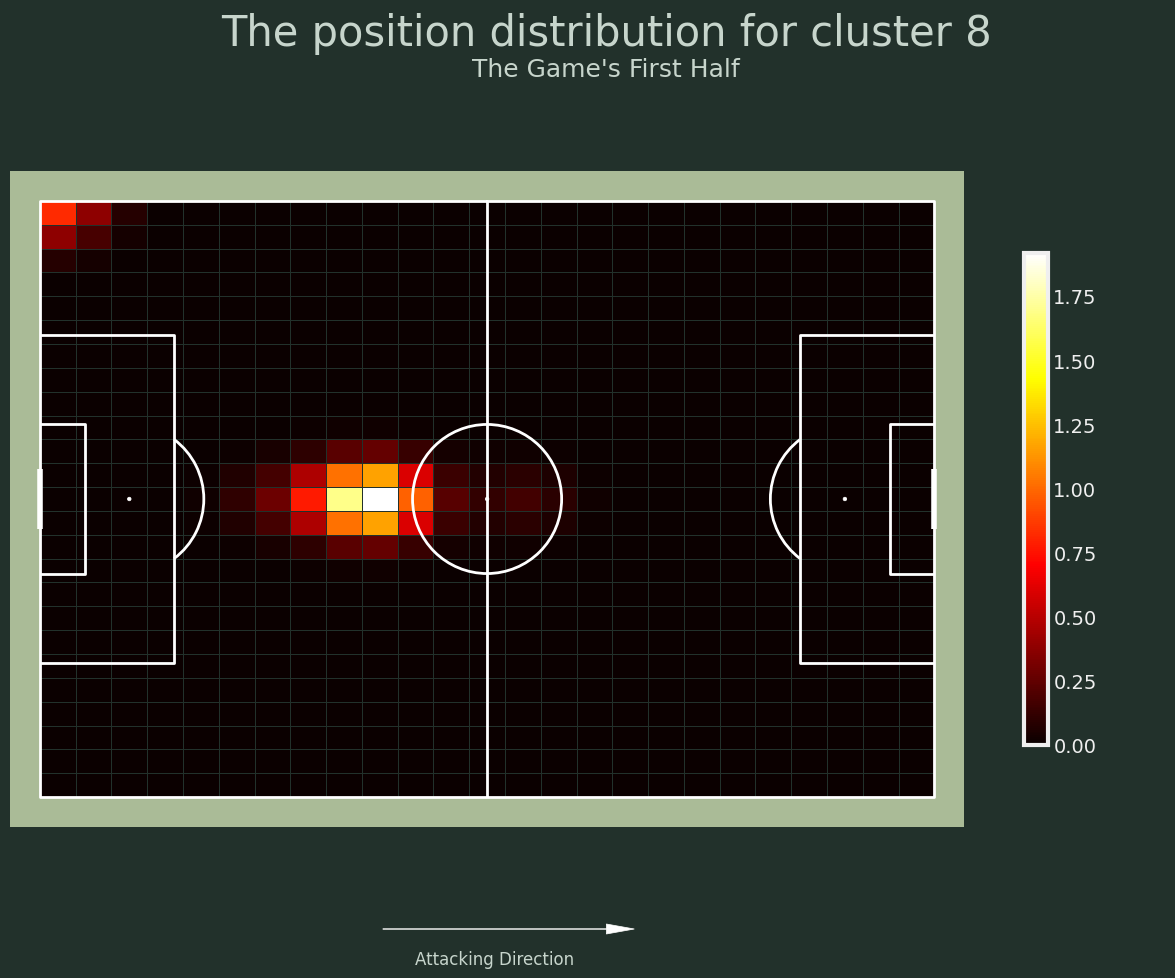

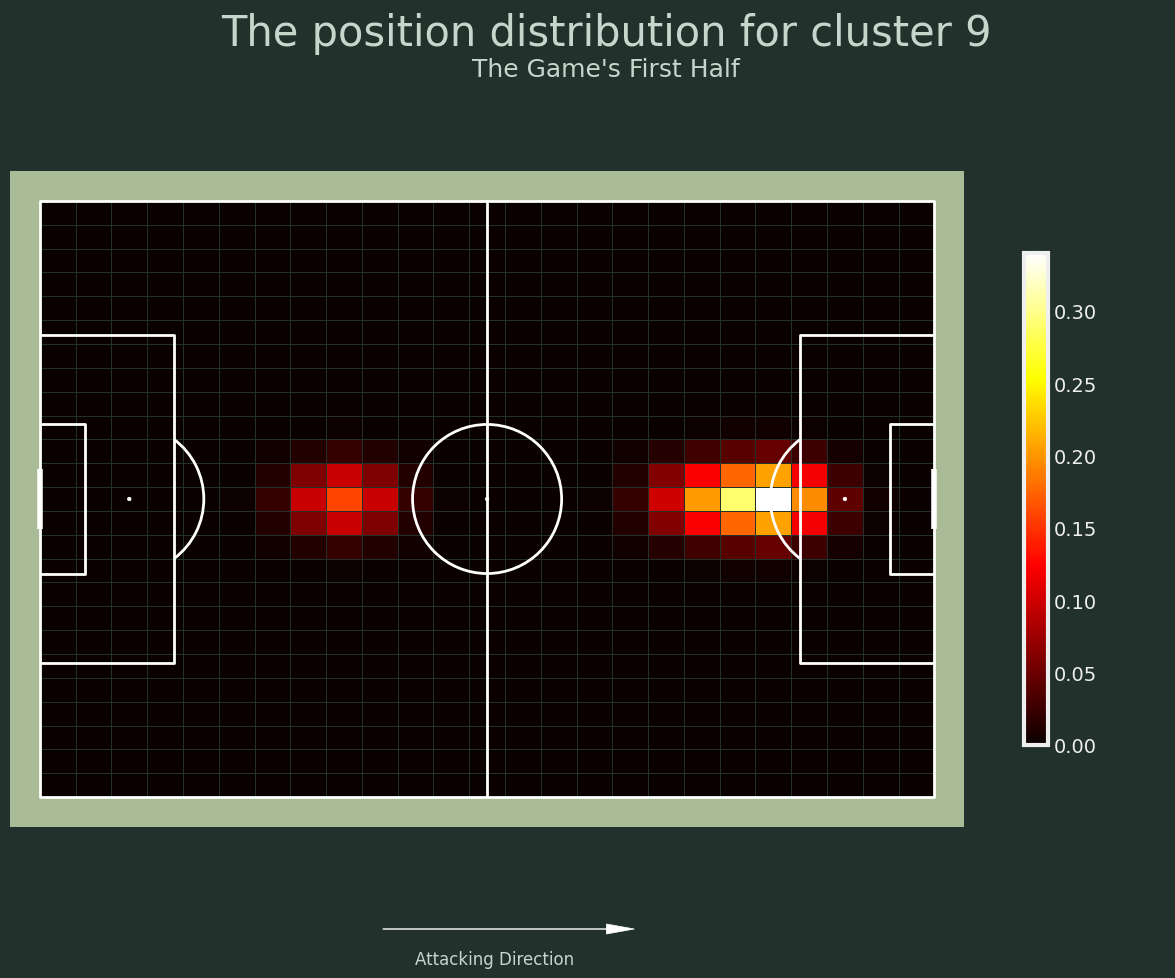

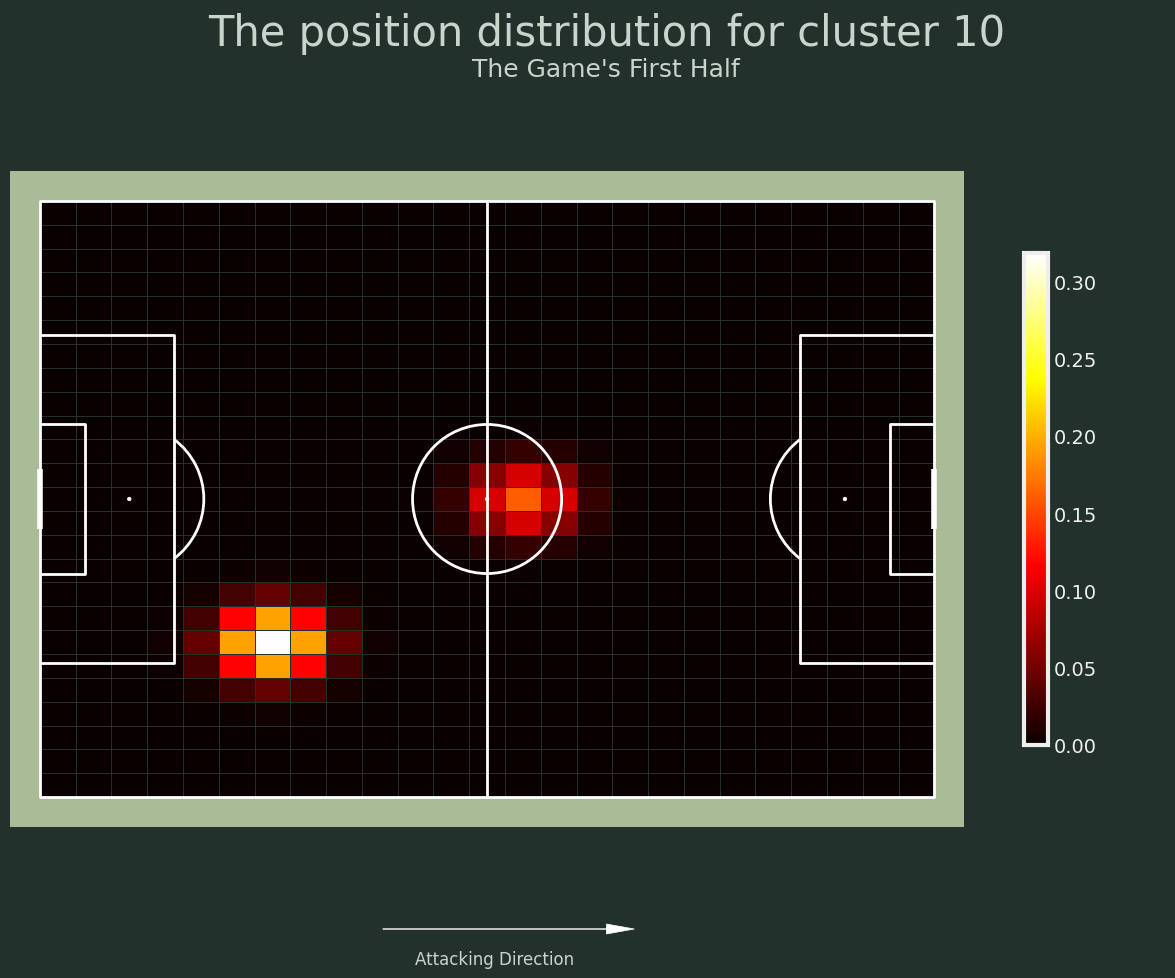

In [166]:
for i in range(10):
    draw_position_map(df, i+1)

In [ ]:
# We didn't know about player's position but after clustering, our results is highly correlated with position.

In [44]:
# To visualize, perform PCA to get 2 dementional dataset
from sklearn.decomposition import PCA 
pca_players = PCA(n_components=2)
principalComponents_players = pca_players.fit_transform(scaled_X)
pca_columns =  ['PCA 1', 'PCA 2']

pca_df = pd.DataFrame(data = principalComponents_players, columns = pca_columns)
pca_df.reset_index(inplace=True)

final_df = pd.merge(df, pca_df, on='index')
final_df

,Name,Current Team,overall_ratings,avg_rating_10_games,goals_per_90min,yels,reds,shoots_per_game,pass_success,tackles,...,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,PCA 1,PCA 2
0,Aaron Hickey,Brentford,6.450000,6.276,0.000000,7.000000,0.000000,0.400000,84.700000,1.500000,...,1,0,0,0,0,0,0,0,-1.140836,0.071478
1,Aaron Ramsdale,Arsenal,6.610000,6.553,0.000000,1.000000,0.000000,0.000000,56.433333,0.033333,...,0,0,0,0,0,0,0,1,-3.990777,2.327718
2,Abdoulaye Doucouré,Everton,6.643333,6.701,0.131502,6.000000,0.333333,0.833333,81.700000,1.866667,...,1,0,0,0,0,0,0,0,0.519523,-0.769397
3,Adam Forshaw,Leeds,6.260000,6.253,0.000000,2.500000,0.000000,0.300000,83.250000,1.650000,...,0,0,0,0,0,1,0,0,-1.400645,1.164715
4,Adam Smith,Bournemouth,6.320000,6.371,0.000000,10.000000,0.000000,0.100000,75.100000,1.300000,...,1,0,0,0,0,0,0,0,-2.028390,0.037627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yoane Wissa,Brentford,6.515000,6.497,0.455392,1.000000,0.000000,1.000000,70.650000,0.400000,...,0,1,0,0,0,0,0,0,0.515297,3.450546
280,Youri Tielemans,Leicester,6.920000,6.518,0.161746,4.333333,0.000000,1.366667,82.333333,2.266667,...,1,0,0,0,0,0,0,0,1.883348,-2.532412
281,Zanka,Brentford,6.400000,6.457,0.087041,1.500000,0.000000,0.250000,80.450000,1.100000,...,0,0,0,0,0,1,0,0,-2.613631,1.075679
282,Álex Moreno,Aston Villa,6.710000,6.740,0.000000,3.000000,0.000000,0.700000,79.400000,1.200000,...,0,0,1,0,0,0,0,0,1.226362,-1.063200


In [45]:


alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Name', 'cluster', 'Current Team', 'PCA 1', 'PCA 2']
).properties(
    width=800,
    height=800
).interactive()

alt.Chart(...)

In [205]:
final_df.to_csv(f'../datasets/labeled_after_clustering/aggromerative/player_stats_with_label.csv')

In [1]:
final_df[final_df['cluster']==5]

NameError: name 'final_df' is not defined

In [206]:
# to visualize PCA and feature correlations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from itertools import cycle
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool
import warnings
warnings.filterwarnings(action='ignore')
output_notebook()
%matplotlib inline


Loading BokehJS ...

In [207]:
from pca_analyzer import *


*--- PCA Report ---*

X mean:		-0.000
X variance:	1.000
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 22 to 13 dimensions while retaining 95% of variance.
2 principal components explain 50.20% of variance.
3 principal components explain 61.30% of variance.


X*X_pca: (22, 284) * (284, 22) = (22, 22)


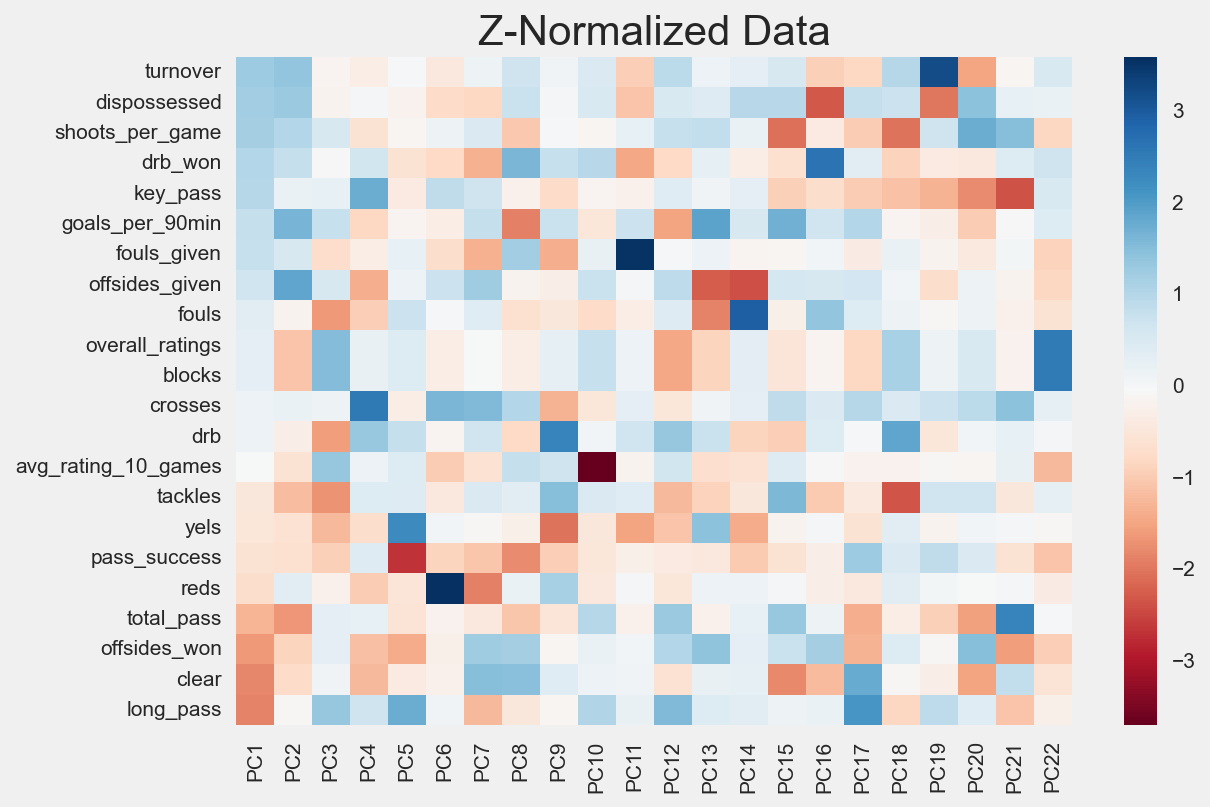

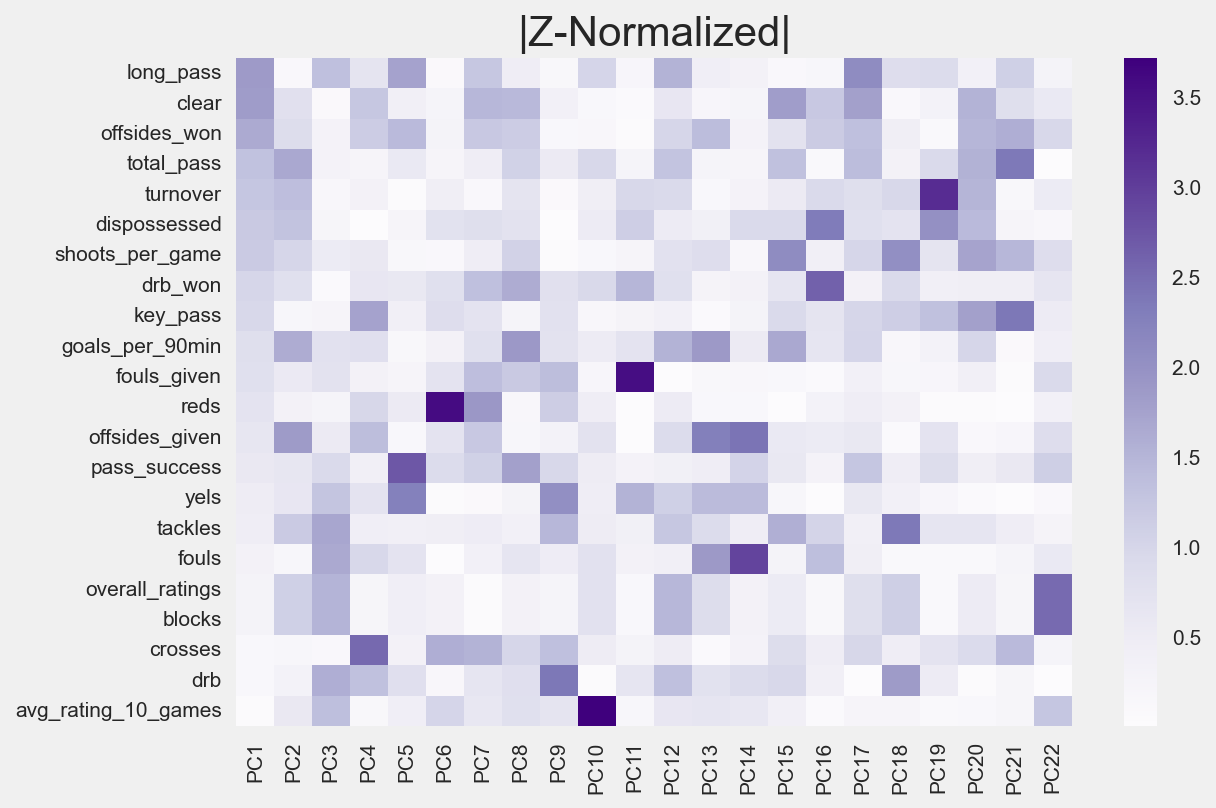

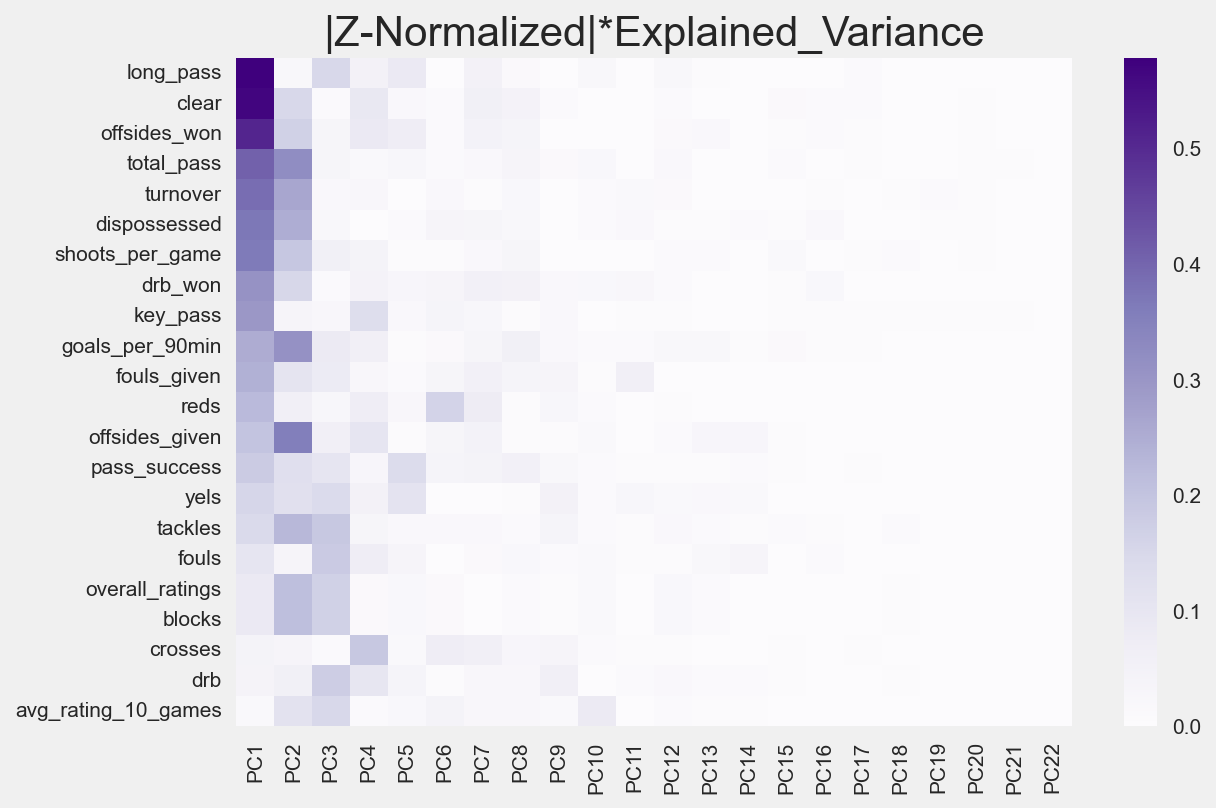

        score_             feature_
rank                               
1     1.050641            long_pass
2     1.046963         offsides_won
3     1.032663                clear
4     0.974859           total_pass
5     0.952570      goals_per_90min
6     0.929718       offsides_given
7     0.850611         dispossessed
8     0.836004             turnover
9     0.813744              drb_won
10    0.809542      shoots_per_game
11    0.805937         pass_success
12    0.799480              tackles
13    0.749911                 yels
14    0.717306                 reds
15    0.708451          fouls_given
16    0.665263             key_pass
17    0.616658                  drb
18    0.614167      overall_ratings
19    0.614167               blocks
20    0.590421                fouls
21    0.555470              crosses
22    0.551533  avg_rating_10_games


(           variance_cumulative      variance
 dimension                                   
 1                     0.308943  3.089427e-01
 2                     0.501619  1.926763e-01
 3                     0.613241  1.116223e-01
 4                     0.688349  7.510789e-02
 5                     0.738337  4.998748e-02
 6                     0.783334  4.499698e-02
 7                     0.823598  4.026435e-02
 8                     0.855216  3.161822e-02
 9                     0.881032  2.581560e-02
 10                    0.904039  2.300663e-02
 11                    0.921822  1.778377e-02
 12                    0.936963  1.514113e-02
 13                    0.950183  1.321952e-02
 14                    0.962483  1.229977e-02
 15                    0.970710  8.227335e-03
 16                    0.978912  8.201923e-03
 17                    0.984396  5.483985e-03
 18                    0.989279  4.883202e-03
 19                    0.993490  4.210513e-03
 20                    0.997186  3

In [208]:
pca_full_report(X=scaled_X, features_=features)


In [35]:
# Ratings, which are very important in reality, seem to be underestimated in PCA
# while Age and Height are overestimated.
# Re-run PCA without "Height" and "age"
# Choose 8 principal component
features = ['overall_ratings', 'avg_rating_10_games', 'mins', 'goals', 'yels', 'reds',
       'shoots_per_game', 'pass_success', 'tackles',
       'fouls', 'offsides_won', 'clear', 'drb', 'blocks', 'key_pass',
       'drb_won', 'fouls_given', 'offsides_given', 'dispossessed', 'turnover',
       'total_pass', 'crosses', 'long_pass']

X = np.array(df[features])
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X


from sklearn.decomposition import PCA 
pca_players = PCA(n_components=8)
principalComponents_players = pca_players.fit_transform(scaled_X)
pca_columns =  ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6', 'PCA 7', 'PCA 8']

pca_df = pd.DataFrame(data = principalComponents_players, columns = pca_columns)
pca_df.reset_index(inplace=True)

final_df = pd.merge(df, pca_df, on='index')
final_df

,Name,Current Team,overall_ratings,avg_rating_10_games,mins,goals,yels,reds,shoots_per_game,pass_success,...,age,index,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8
0,Aaron Hickey,Brentford,6.450000,6.276,1861.000000,0.000000,7.000000,0.000000,0.400000,84.700000,...,20.0,0,-1.149214,0.213238,-2.081091,-0.582364,0.635510,-0.578033,-0.740320,-0.151944
1,Aaron Ramsdale,Arsenal,6.610000,6.553,3270.000000,0.000000,1.000000,0.000000,0.000000,56.433333,...,25.0,1,-3.921249,1.142563,3.626632,0.468050,2.335048,-0.097415,-0.466236,0.468987
2,Abdoulaye Doucouré,Everton,6.643333,6.701,2143.000000,2.666667,6.000000,0.333333,0.833333,81.700000,...,30.0,2,0.563113,-0.705680,-1.456909,-0.512361,0.862276,0.649231,-0.482950,-0.534252
3,Adam Forshaw,Leeds,6.260000,6.253,959.000000,0.000000,2.500000,0.000000,0.300000,83.250000,...,31.0,3,-1.541740,1.643881,-2.532807,0.800955,0.164439,-0.139088,0.021628,-0.602665
4,Adam Smith,Bournemouth,6.320000,6.371,2867.000000,0.000000,10.000000,0.000000,0.100000,75.100000,...,32.0,4,-1.952155,-0.290102,-1.941359,-0.454380,2.849619,0.177294,0.764440,-0.087156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yoane Wissa,Brentford,6.515000,6.497,1393.500000,7.000000,1.000000,0.000000,1.000000,70.650000,...,26.0,279,0.114899,3.181199,1.329448,-0.797495,-0.234975,-0.115265,0.637575,-0.419515
280,Youri Tielemans,Leicester,6.920000,6.518,2751.000000,5.000000,4.333333,0.000000,1.366667,82.333333,...,26.0,280,2.192587,-2.503686,-1.155290,1.205258,1.274290,-0.365510,-0.036652,-1.110495
281,Zanka,Brentford,6.400000,6.457,762.500000,0.500000,1.500000,0.000000,0.250000,80.450000,...,33.0,281,-2.833495,1.289701,-0.904727,0.183037,-0.732015,-0.087175,0.683375,-0.548998
282,Álex Moreno,Aston Villa,6.710000,6.740,1336.000000,0.000000,3.000000,0.000000,0.700000,79.400000,...,29.0,282,1.227127,-0.519175,-1.200931,1.599953,-0.745024,0.000579,0.882570,1.217550


In [48]:
# To cluster, we use 10 columns (overall_ratings, avg_rating_10_games, pca 1~8)
features = ['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7','PCA 8']
X = np.array(final_df[features])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-4.37999569e-01,  1.00854415e-01, -1.28466403e+00, ...,
        -5.79876962e-01, -7.83761421e-01, -1.82106612e-01],
       [-1.49450457e+00,  5.40393256e-01,  2.23873123e+00, ...,
        -9.77258673e-02, -4.93593957e-01,  5.62085703e-01],
       [ 2.14619202e-01, -3.33762453e-01, -8.99354205e-01, ...,
         6.51302562e-01, -5.11288825e-01, -6.40306101e-01],
       ...,
       [-1.07992930e+00,  6.09984655e-01, -5.58490445e-01, ...,
        -8.74527700e-02,  7.23474353e-01, -6.57980077e-01],
       [ 4.67694740e-01, -2.45551902e-01, -7.41338208e-01, ...,
         5.80618532e-04,  9.34358253e-01,  1.45924608e+00],
       [-1.48155686e+00,  7.13768465e-01,  1.11683468e+00, ...,
        -1.09990547e-01, -1.04912671e+00, -1.40644990e+00]])

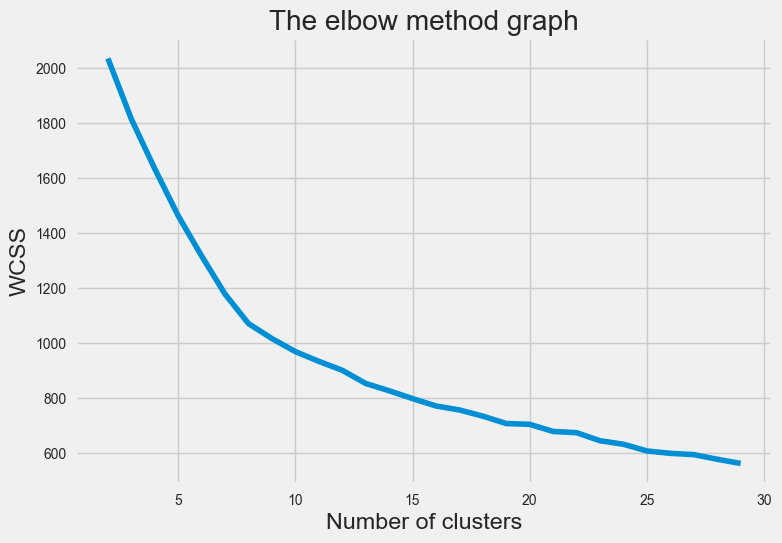

In [49]:
# find out the optimal number of clusters by within-cluster-sum of squared errors
wcss = []

for i in range(2,30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)

plt.style.use("fivethirtyeight") 
plt.plot(range(2,30), wcss)
plt.title(f'The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

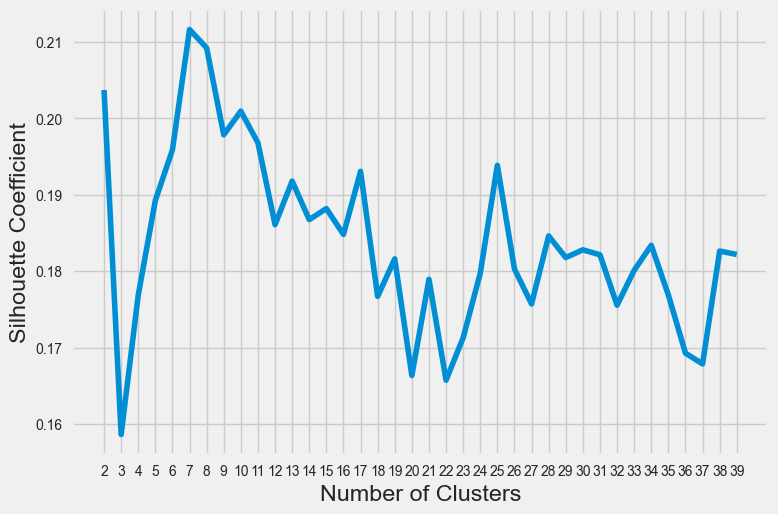

In [50]:
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 40), silhouette_coefficients)
plt.xticks(range(2, 40))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

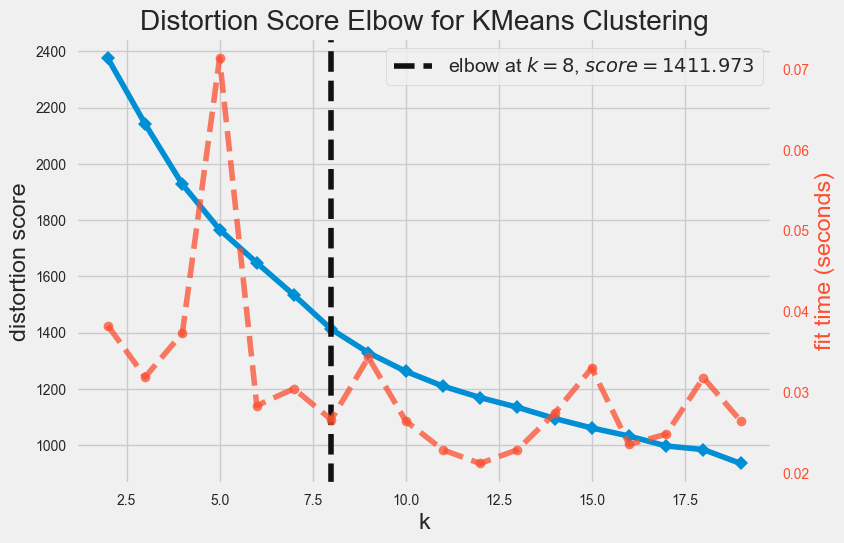

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

In [51]:
OPTIMAL_N_CLUSTERS = 7

kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

final_df['cluster'] = kmeans.fit_predict(scaled_X)


In [52]:
# visualize using altair
import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Name', 'cluster', 'Current Team', 'PCA 1', 'PCA 2']
).properties(
    width=800,
    height=800
).interactive()

alt.Chart(...)

In [87]:
# export csv file
final_df.to_csv(f'../datasets/labeled_after_clustering/kmeans/player_stats_with_label.csv')

In [93]:
# just to check the columns
final_df.columns


Index(['Name', 'Current Team', 'overall_ratings', 'avg_rating_10_games',
       'mins', 'goals', 'yels', 'reds', 'shoots_per_game', 'pass_success',
       'tackles', 'fouls', 'offsides_won', 'clear', 'drb', 'blocks',
       'key_pass', 'drb_won', 'fouls_given', 'offsides_given', 'dispossessed',
       'turnover', 'total_pass', 'crosses', 'long_pass', 'Height', 'age',
       'index', 'cluster', 'PCA 1', 'PCA 2'],
      dtype='object')

In [95]:
final_df

,Name,Current Team,overall_ratings,avg_rating_10_games,mins,goals,yels,reds,shoots_per_game,pass_success,...,turnover,total_pass,crosses,long_pass,Height,age,index,cluster,PCA 1,PCA 2
0,Aaron Hickey,Brentford,6.450000,6.276,1861.000000,0.000000,7.000000,0.000000,0.400000,84.700000,...,0.600000,28.4,0.200000,1.100000,178.0,20.0,0,0,-0.803671,0.526813
1,Aaron Ramsdale,Arsenal,6.610000,6.553,3270.000000,0.000000,1.000000,0.000000,0.000000,56.433333,...,0.033333,27.0,0.000000,5.233333,188.0,25.0,1,5,-3.979549,1.201958
2,Abdoulaye Doucouré,Everton,6.643333,6.701,2143.000000,2.666667,6.000000,0.333333,0.833333,81.700000,...,1.200000,34.6,0.033333,0.800000,184.0,30.0,2,0,0.437709,-0.766215
3,Adam Forshaw,Leeds,6.260000,6.253,959.000000,0.000000,2.500000,0.000000,0.300000,83.250000,...,0.800000,26.0,0.150000,1.600000,174.0,31.0,3,2,-1.239768,1.916042
4,Adam Smith,Bournemouth,6.320000,6.371,2867.000000,0.000000,10.000000,0.000000,0.100000,75.100000,...,0.600000,25.8,0.500000,1.600000,180.0,32.0,4,0,-1.930282,-0.127259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yoane Wissa,Brentford,6.515000,6.497,1393.500000,7.000000,1.000000,0.000000,1.000000,70.650000,...,1.100000,8.8,0.000000,0.200000,176.0,26.0,279,2,0.384739,3.197409
280,Youri Tielemans,Leicester,6.920000,6.518,2751.000000,5.000000,4.333333,0.000000,1.366667,82.333333,...,1.200000,55.9,0.466667,2.500000,176.0,26.0,280,0,2.274136,-2.447240
281,Zanka,Brentford,6.400000,6.457,762.500000,0.500000,1.500000,0.000000,0.250000,80.450000,...,0.100000,28.7,0.150000,1.300000,191.0,33.0,281,2,-3.061119,1.267395
282,Álex Moreno,Aston Villa,6.710000,6.740,1336.000000,0.000000,3.000000,0.000000,0.700000,79.400000,...,2.000000,30.5,0.800000,0.500000,179.0,29.0,282,0,1.277538,-0.495402


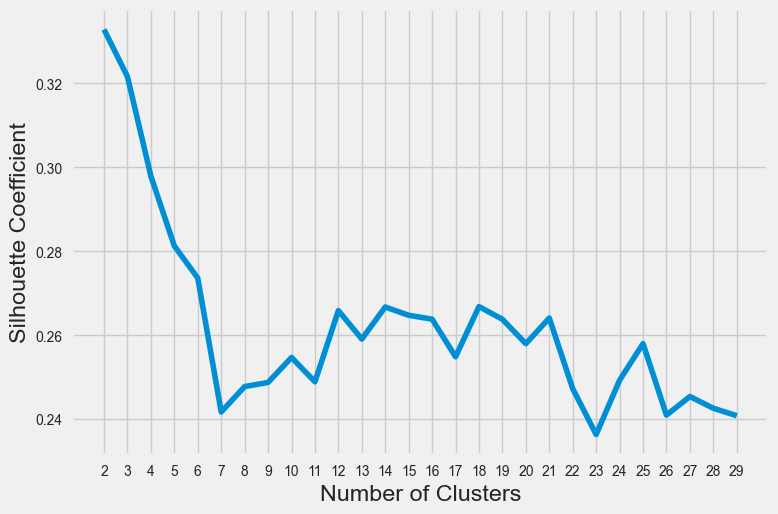

In [99]:
# different features
features_tuned = ['overall_ratings', 'avg_rating_10_games', 'PCA 1', 'PCA 2']

X = np.array(final_df[features_tuned])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

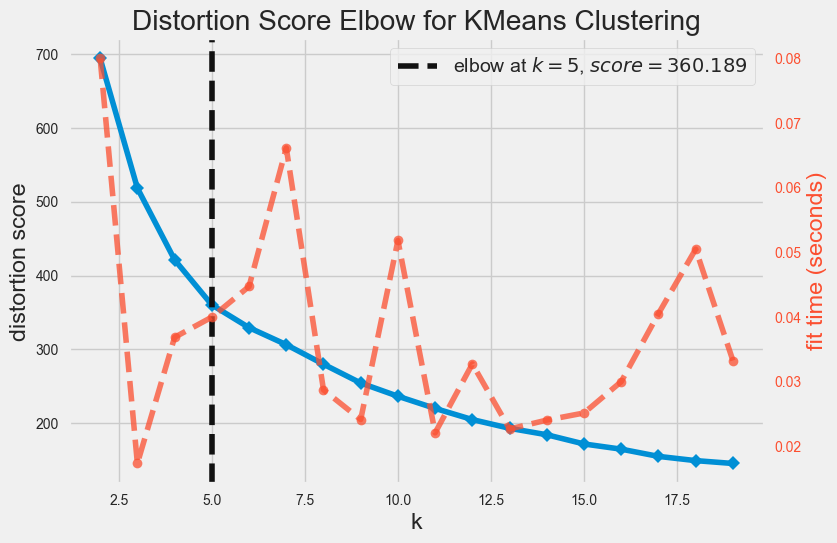

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

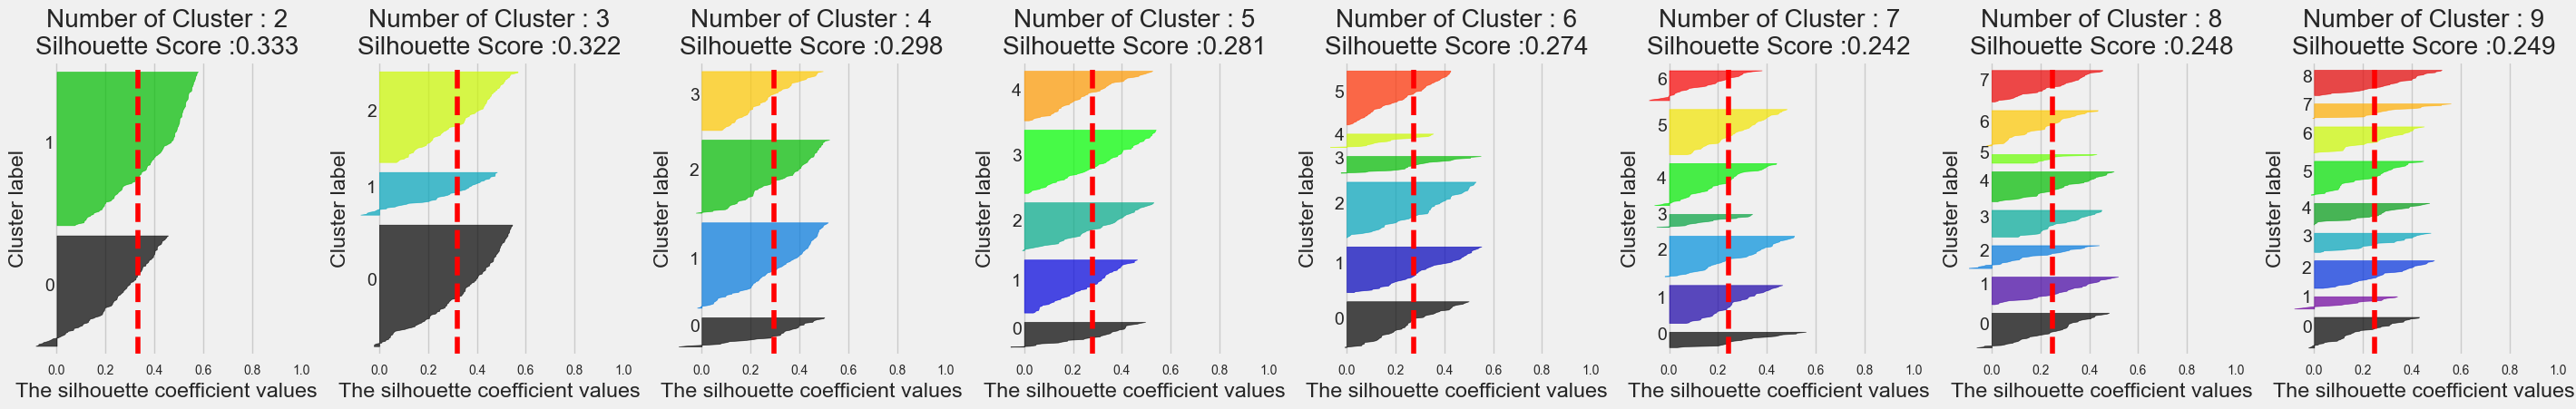

In [98]:
visualize_silhouette(range(2,10), scaled_X)

In [100]:
OPTIMAL_N_CLUSTERS = 18

kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

final_df['cluster'] = kmeans.fit_predict(scaled_X)

In [102]:
# import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Name', 'cluster', 'Current Team', 'overall_ratings', 'PCA 1', 'PCA 2']
).properties(
    width=800,
    height=800
).interactive()

alt.Chart(...)

In [115]:
evr = pca_players.explained_variance_ratio_

In [116]:
cumsum = np.cumsum(evr)


In [117]:
cumsum

array([0.60521732, 0.85554617, 0.96481263, 1.        ])